In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # 훈련셋과 테스트셋을 분리
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense, Dropout # Dense(모델 layer), Dropout(과적합)
import matplotlib.pyplot as plt
from tensorflow.keras import metrics # 성능지표들

- 심장병 발병 예측
```
    1. 데이터셋 생성 & 전처리
        엑셀데이터 -> ?를 nan -> nan 처리 -> X, y 분리 -> 스케일조정 -> 훈련셋과 테스트셋 분리 (api이용)
    2. 모델 생성 & 구성 (과적합 줄이기 단계 추가)
    3. 모델 학습과정설정 (accuracy, precision, recall)
    4. 모델 학습시키기 (훈련셋의 일부를 검증셋으로 학습)
    5. 모델 평가 - 과정살펴보기(그래프), evaluate, pd.crosstab/confusion_matrix
    6. 모델 사용하기
```
```
    age - 나이
    sex - (1 = 남성; 0 = 여성)
    cp - 가슴 통증 유형(0, 1, 2, 3, 4)
    trestbps - 안정 혈압(병원 입원시 mm Hg)
    chol - 혈청 콜레스테롤(mg/dl)
    fbs - (공복 혈당 > 120 mg/dl)(1 = true; 0 = false)
    restecg - 안정 심전도 결과(0, 1, 2)
    thalach - 최대 심박동수
    exang - 협심증 유발 운동(1 = yes; 0 = no)
    oldpeak - 비교적 안정되기까지 운동으로 유발되는 ST depression
    slope - 최대 운동 ST segment의 기울기
    ca - 형광 투시된 주요 혈관의 수(0-3)
    hsl - (3 = 보통; 6 = 해결된 결함; 7 = 해결가능한 결함)
    heartDisease - 심장병 진단(1 = true; 0 = false)
```

# 1. 데이터셋 생성 & 전처리
      엑셀데이터 -> ?를 nan -> nan 처리 -> X, y 분리 -> 스케일조정 -> 훈련셋과 테스트셋 분리 (api이용)

In [2]:
raw_data = pd.read_excel('./data/heart-disease.xlsx')
raw_data.head()

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,0,108,1,1.5,2,3,3,1
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshtbps     303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  hsl           303 non-null    object 
 13  heartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [4]:
# raw_data의 타입이 object인 열에 ?가 있는 데이터 추출
raw_data[(raw_data['chol']=='?') | (raw_data['ca']=='?') | (raw_data['hsl']=='?')]

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [5]:
# '?'를 결측치(np.nan)로 대체
clean_data = raw_data.replace('?',np.nan)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshtbps     303 non-null    int64  
 4   chol          302 non-null    float64
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            299 non-null    float64
 12  hsl           301 non-null    float64
 13  heartDisease  303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


In [6]:
# clean_data에 결측치가 포함된 데이터 추출
clean_data[clean_data.isna().any(axis=1)]

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
2,67,1,4,120,NaN,0,2,129,1,2.6,2,2.0,7.0,1
87,53,0,3,128,216.0,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223.0,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247.0,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204.0,1,0,156,1,1.0,2,0.0,NaN,1
287,58,1,2,125,220.0,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175.0,0,0,173,0,0.0,1,NaN,3.0,0


In [7]:
# 결측치를 중앙값으로 대체
# 열별 중앙값 : clean_data.median() - axis=0은 기본값이므로 생략 가는
clean_data.fillna(value=clean_data.median())

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
0,63,1,1,145,233.0,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286.0,0,0,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,241.5,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250.0,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204.0,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264.0,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193.0,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131.0,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236.0,0,2,174,0,0.0,2,1.0,3.0,1


In [8]:
# 결측치가 하나라도 있는 행은 제거
clean_data.dropna(how='any', inplace=True)
clean_data.isna().sum()

age             0
sex             0
cp              0
treshtbps       0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hsl             0
heartDisease    0
dtype: int64

In [9]:
clean_data.head()

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
0,63,1,1,145,233.0,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286.0,0,0,108,1,1.5,2,3.0,3.0,1
3,37,1,3,130,250.0,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204.0,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236.0,0,0,178,0,0.8,1,0.0,3.0,0


In [10]:
# 독립변수(입력변수, X), 종속변수(타겟변수, y)
Input = clean_data.iloc[:,:-1]
target = clean_data.iloc[:,[-1]]
Input.shape, target.shape

((296, 13), (296, 1))

In [11]:
# 전체 296개 데이터 중 심장병이 걸린 데이터 수(1)
target['heartDisease'].sum()

136

In [12]:
# 심장병이 걸린 데이터 확률
target['heartDisease'].mean()

0.4594594594594595

In [13]:
# unique 별 데이터 갯수
target['heartDisease'].value_counts()

0    160
1    136
Name: heartDisease, dtype: int64

In [14]:
# scale 조정(Input 데이터만)
scaler = MinMaxScaler()
scaled_input = pd.DataFrame(scaler.fit_transform(Input))
print(scaled_input.shape, Input.shape)
scaled_input.head(2)

(296, 13) (296, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.708333,1.0,0.0,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.0,0.75
1,0.791667,1.0,1.0,0.622642,0.365297,0.0,0.0,0.282443,1.0,0.241935,0.5,1.0,0.00


In [15]:
# scaled_input와 Target => 학습셋:시험셋 = 7 : 3
X_train, X_test, y_train, y_test = train_test_split(scaled_input, # 입력변수(독립변수)
                 target, # 타겟변수(종속변수)
                 test_size=.3, # 시험셋 사이즈가 지정되면 학습셋은 자동 지정
                 random_state=42 # random seed값
                )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((207, 13), (207, 1), (89, 13), (89, 1))

# 2. 모델 생성 & 구성 (과적합 줄이기 단계 추가)

In [16]:
model = Sequential()
model.add(Dense(units=500, input_dim=13, activation='tanh'))
# 과적합을 해결하고자 dropout (두루뭉실하게 출력)
model.add(Dropout(.1))
model.add(Dense(units=200, activation='tanh'))
model.add(Dropout(.1))
model.add(Dense(units=100, activation='tanh'))
model.add(Dropout(.1))
# 출력층에서의 활성화 함수 : 이진분류(sigmoid), 분류분석(softmax)
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               7000      
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

# 3. 모델 학습과정설정 (accuracy, precision, recall)# 

In [17]:
# 분류분석일 때, 성능평가지표
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['binary_accuracy', metrics.Precision(), metrics.Recall()])

# 4. 모델 학습시키기 (훈련셋의 일부를 검증셋으로 학습)

In [18]:
hist = model.fit(X_train, y_train,
                 epochs=100,
                 batch_size=100,
                 validation_split=.2, # 훈련데이터 셋의 20%를 검증데이터로
                 verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 334ms/step - loss: 0.6630 - binary_accuracy: 0.6061 - precision: 0.5500 - recall: 0.8571 - val_loss: 0.5215 - val_binary_accuracy: 0.8095 - val_precision: 0.8235 - val_recall: 0.7368
Epoch 2/100
2/2 [==============================] - 0s 69ms/step - loss: 0.5363 - binary_accuracy: 0.8121 - precision: 0.7949 - recall: 0.8052 - val_loss: 0.4306 - val_binary_accuracy: 0.7857 - val_precision: 0.8125 - val_recall: 0.6842
Epoch 3/100
2/2 [==============================] - 0s 42ms/step - loss: 0.4769 - binary_accuracy: 0.8182 - precision: 0.7975 - recall: 0.8182 - val_loss: 0.4006 - val_binary_accuracy: 0.8333 - val_precision: 0.8333 - val_recall: 0.7895
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 0.4629 - binary_accuracy: 0.8121 - precision: 0.7738 - recall: 0.8442 - val_loss: 0.3772 - val_binary_accuracy: 0.8095 - val_precision: 0.8235 - val_recall: 0.7368
Epoch 5/100
2/2 [==============================] - 0s 3

Epoch 36/100
2/2 [==============================] - 0s 32ms/step - loss: 0.3783 - binary_accuracy: 0.8424 - precision: 0.8592 - recall: 0.7922 - val_loss: 0.3714 - val_binary_accuracy: 0.8571 - val_precision: 0.8824 - val_recall: 0.7895
Epoch 37/100
2/2 [==============================] - 0s 32ms/step - loss: 0.3647 - binary_accuracy: 0.8606 - precision: 0.8750 - recall: 0.8182 - val_loss: 0.3766 - val_binary_accuracy: 0.8333 - val_precision: 0.8333 - val_recall: 0.7895
Epoch 38/100
2/2 [==============================] - 0s 31ms/step - loss: 0.3675 - binary_accuracy: 0.8545 - precision: 0.8442 - recall: 0.8442 - val_loss: 0.3777 - val_binary_accuracy: 0.8333 - val_precision: 0.8333 - val_recall: 0.7895
Epoch 39/100
2/2 [==============================] - 0s 29ms/step - loss: 0.3677 - binary_accuracy: 0.8545 - precision: 0.8533 - recall: 0.8312 - val_loss: 0.3740 - val_binary_accuracy: 0.8571 - val_precision: 0.8824 - val_recall: 0.7895
Epoch 40/100
2/2 [==============================] - 

2/2 [==============================] - 0s 34ms/step - loss: 0.3373 - binary_accuracy: 0.8606 - precision: 0.8857 - recall: 0.8052 - val_loss: 0.3725 - val_binary_accuracy: 0.8810 - val_precision: 0.8889 - val_recall: 0.8421
Epoch 71/100
2/2 [==============================] - 0s 30ms/step - loss: 0.3183 - binary_accuracy: 0.8788 - precision: 0.9014 - recall: 0.8312 - val_loss: 0.3738 - val_binary_accuracy: 0.8810 - val_precision: 0.8889 - val_recall: 0.8421
Epoch 72/100
2/2 [==============================] - 0s 36ms/step - loss: 0.3238 - binary_accuracy: 0.8788 - precision: 0.8800 - recall: 0.8571 - val_loss: 0.3816 - val_binary_accuracy: 0.8571 - val_precision: 0.8421 - val_recall: 0.8421
Epoch 73/100
2/2 [==============================] - 0s 35ms/step - loss: 0.3091 - binary_accuracy: 0.8788 - precision: 0.8800 - recall: 0.8571 - val_loss: 0.3800 - val_binary_accuracy: 0.8810 - val_precision: 0.8889 - val_recall: 0.8421
Epoch 74/100
2/2 [==============================] - 0s 33ms/step 

# 5. 모델 평가 - 과정살펴보기(그래프), evaluate, pd.crosstab/confusion_matrix & 모델 사용하기

In [19]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy', 'precision', 'recall', 'val_loss', 'val_binary_accuracy', 'val_precision', 'val_recall'])

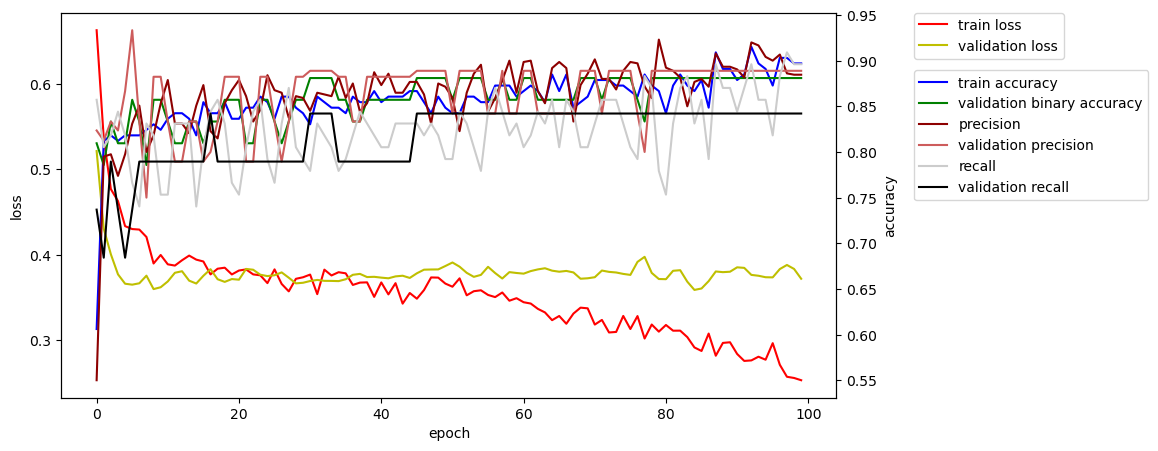

In [26]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_binary_accuracy'], 'g', label='validation binary accuracy')
acc_ax.plot(hist.history['precision'], '#8d0000', label='precision')
acc_ax.plot(hist.history['val_precision'], '#cd5c5c', label='validation precision')
acc_ax.plot(hist.history['recall'], '#cccccc', label='recall')
acc_ax.plot(hist.history['val_recall'], 'k', label='validation recall')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.1, .85), loc=2, borderaxespad=0.)
plt.show()

In [31]:
# 모델 평가
score = model.evaluate(X_test, y_test)
print('loss :',score[0])
print('accuracy :',score[1])
print('precision :',score[2])
print('recall :',score[3])

3/3 [==============================] - 0s 5ms/step - loss: 0.4106 - binary_accuracy: 0.8090 - precision: 0.8108 - recall: 0.7500
loss : 0.4106391668319702
accuracy : 0.8089887499809265
precision : 0.8108108043670654
recall : 0.75


In [49]:
#  confusion matrix (매개변수에 2차원 데이터)
y_hat = (model.predict(X_test) > 0.5)
print(y_hat.shape)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
print(confusion_matrix(y_test, y_hat))
print('f1 score :', f1_score(y_test, y_hat))

3/3 [==============================] - 0s 2ms/step
(89, 1)
[[42  7]
 [10 30]]
f1 score : 0.7792207792207791


In [50]:
# 교차표
pd.crosstab(y_test.values.reshape(-1), y_hat.reshape(-1))

col_0,False,True
row_0,,
0,42,7
1,10,30
